In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
data=pd.read_csv('..\\..\\dataPreprocessing\\k_movie.csv')
data


,Unnamed: 0,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,Unnamed: 0.1,CRITIC_RT,VIEWER_RT
0,0,산상수훈,유영의,(주)그란,"이언픽쳐스,(주)그란",20171207,개봉영화,장편,한국,71.0,284.0,284.000000,드라마,전체관람가,독립/예술영화,NaN,3.00,6.30
1,1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",커넥트픽쳐스(주),20190516,개봉영화,장편,한국,200.0,154.0,154.000000,다큐멘터리,전체관람가,독립/예술영화,1.0,5.59,9.31
2,2,기생충,봉준호,(주)바른손이앤에이,(주)씨제이이엔엠,20190530,개봉영화,장편,한국,1948.0,227811.0,97354.000000,드라마,15세이상관람가,일반영화,2.0,9.06,8.49
3,3,엑시트,이상근,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,20190731,개봉영화,장편,한국,1660.0,40.0,26656.504132,코미디,12세이상관람가,일반영화,3.0,5.59,7.44
4,4,김복동,송원근,한국탐사저널리즘센터,(주)엣나인필름,20190808,개봉영화,장편,한국,366.0,110.0,26656.504132,다큐멘터리,12세이상관람가,독립/예술영화,4.0,6.60,8.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,530,2차 송환,김동원,푸른영상,(주)시네마달,2022-09-,개봉영화,장편,한국,16.0,415.0,373.000000,다큐멘터리,12세이상관람가,독립/예술영화,530.0,8.20,6.44
379,531,EBS친구들 씽씽 댄스파티,NaN,한국교육방송공사 EBS,(주)에픽캔,2022-09-,개봉영화,장편,한국,1.0,60.0,22.000000,가족,전체관람가,일반영화,531.0,5.59,7.44
380,537,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,주식회사 씨엠닉스,2022-09-,개봉영화,장편,한국,9.0,395.0,250.000000,미스터리,15세이상관람가,독립/예술영화,537.0,5.59,7.47
381,541,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,(주)트리플픽쳐스,2022-09-,개봉영화,장편,한국,6.0,662.0,336.000000,액션,12세이상관람가,독립/예술영화,541.0,5.59,8.84


In [3]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


No handles with labels found to put in legend.


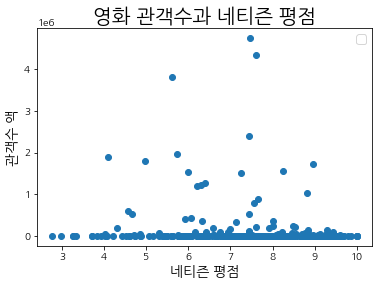

2.77
10.0


In [4]:
#네티즌 평점에 따른 관객수 변화 plot으로 나타내기
import matplotlib.pyplot as plt
netizenViewer=data.dropna(subset=['VIEWNG_NMPR_CO', 'VIEWER_RT'])
fig, ax = plt.subplots()
ax.plot(netizenViewer['VIEWER_RT'],
        netizenViewer['VIEWNG_NMPR_CO'], 
        marker='o', 
        linestyle='')
ax.legend(fontsize=12, bbox_to_anchor=(1,1)) # legend position
plt.title('영화 관객수과 네티즌 평점', fontsize=20)
plt.xlabel('네티즌 평점', fontsize=14)
plt.ylabel('관객수 액', fontsize=14)
plt.show()

print(min(netizenViewer['VIEWER_RT']))
print(max(netizenViewer['VIEWER_RT']))



In [5]:
from scipy.stats import shapiro, levene
#정규분포인지 확인 - 둘다 비정규
print(shapiro(netizenViewer['VIEWNG_NMPR_CO']))
print(shapiro(netizenViewer['VIEWER_RT']))

#등분산성 - 등분산성을 따르지 않음
print(levene(netizenViewer['VIEWNG_NMPR_CO'], netizenViewer['VIEWER_RT'], center='median'))

ShapiroResult(statistic=0.23910444974899292, pvalue=1.671449795429078e-36)
ShapiroResult(statistic=0.9570505619049072, pvalue=4.678251563916547e-09)
LeveneResult(statistic=19.56379274813651, pvalue=1.1161772845381493e-05)


In [6]:
#선형 관계가 있는 지 확인 : 연속-연속 비정규 : spearman - 선형관계가 있음 : -0.01(0과 매우 가깝..) 선형 관계 있다고 볼 수 있을까..?
print(stats.spearmanr(netizenViewer['VIEWNG_NMPR_CO'],netizenViewer['VIEWER_RT']))

SpearmanrResult(correlation=-0.004644757331697584, pvalue=0.9282825994502084)


In [7]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('VIEWNG_NMPR_CO ~ VIEWER_RT',data=netizenViewer).fit() ## 단순선형회귀모형 적합

In [8]:
fit.summary()
#R제곱과 수정 R제곱 수치가 0.530 ~ 0.529로 나타났다. : 1%정도의 자료만 설명 가능

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         VIEWNG_NMPR_CO   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.090
Date:                Wed, 07 Dec 2022   Prob (F-statistic):             0.0438
Time:                        11:23:48   Log-Likelihood:                -5479.5
No. Observations:                 378   AIC:                         1.096e+04
Df Residuals:                     376   BIC:                         1.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.644e+05   1.28e+05      2.840      0.005    1.12e+05    6.17e+05
VIEWER_RT  -3.396e+04   1.68e+04     -2.022      0.044    -6.7e+04    -942.193
==============================================================================
Omnibus:                      499.222   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41871.137
Skew:                           6.536   Prob(JB):                         0.00
Kurtosis:                      52.876   Cond. No.                         40.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
## 변수의 선언
x = netizenViewer['VIEWER_RT']
y = netizenViewer['VIEWNG_NMPR_CO']

## 모델의 선언
netizenViewer_linearRegression = LinearRegression()
 
## 모델-데이터셋의 학습 진행
netizenViewer_linearRegression.fit(x.values.reshape(-1,1), y)
 
 
## 예측 실행
print( '네티즌 평점 4점일때 관람 인원 예측 관람 인원 예측 :{}'.format(netizenViewer_linearRegression.predict([[4]])[0])
    , 'X변수 계수: {}'.format(netizenViewer_linearRegression.coef_[0])
    , sep = '\n')

네티즌 평점 4점일때 관람 인원 예측 관람 인원 예측 :228523.70547203175
X변수 계수: -33961.26994822415


In [10]:
#기울기
print(netizenViewer_linearRegression.coef_)

#절편
print(netizenViewer_linearRegression.intercept_)

[-33961.26994822]
364368.78526492836


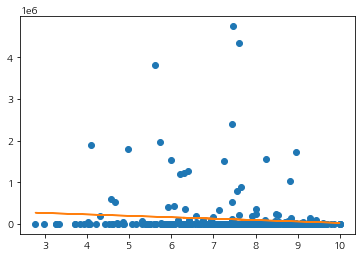

In [11]:
plt.plot(x, y, 'o')
plt.plot(x,netizenViewer_linearRegression.predict(x.values.reshape(-1,1)))
plt.show()